In [ ]:
import pandas as pd
df = pd.read_csv('walmart_2018_11_06.csv')  # kolom: latitude, longitude
print(df.head())

   index                       name  \
0      0         Conway Supercenter   
1      1       Sikeston Supercenter   
2      2      Tahlequah Supercenter   
3      3  Mountain Home Supercenter   
4      4      Claremore Supercenter   

                                                 url          street_address  \
0  https://www.walmart.com/store/5/conway-ar/details       1155 Hwy 65 North   
1  https://www.walmart.com/store/9/sikeston-mo/de...          1303 S Main St   
2  https://www.walmart.com/store/10/tahlequah-ok/...     2020 S Muskogee Ave   
3  https://www.walmart.com/store/11/mountain-home...          65 Wal Mart Dr   
4  https://www.walmart.com/store/12/claremore-ok/...  1500 S Lynn Riggs Blvd   

            city state  zip_code country phone_number_1  phone_number_2  ...  \
0         Conway    AR     72032      US   501-329-0023             NaN  ...   
1       Sikeston    MO     63801      US   573-472-3020             NaN  ...   
2      Tahlequah    OK     74464      US   9

In [22]:
from sklearn.preprocessing import StandardScaler

coords = df[['latitude', 'longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

In [23]:
from sklearn.preprocessing import StandardScaler

coords = df[['latitude', 'longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

In [24]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(coords_scaled)
df['cluster'] = labels

In [25]:
print(df['cluster'].value_counts().head(10))

cluster
 0    4617
 1      18
 3      10
 2       6
-1       3
Name: count, dtype: int64


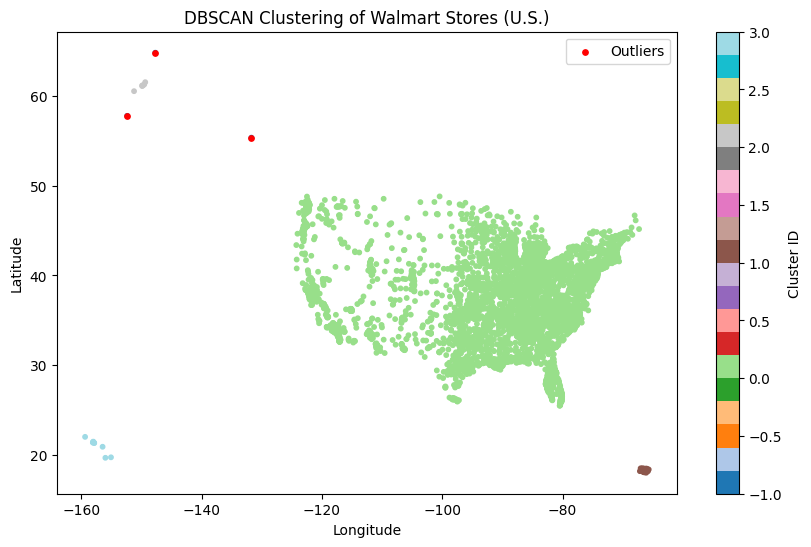

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['longitude'], df['latitude'],
            c=df['cluster'], cmap='tab20', s=10)
plt.colorbar(label='Cluster ID')
plt.scatter(df[df['cluster']==-1]['longitude'],
            df[df['cluster']==-1]['latitude'],
            color='red', s=15, label='Outliers')
plt.legend()
plt.title('DBSCAN Clustering of Walmart Stores (U.S.)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()